----- 
### 기초 선언

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql as my
import numpy as np
import wordcloud as wc
from scipy import signal

 csv 파일 불러오기

In [3]:
terrorism = pd.read_csv("/home/rds/amr_ws/edm/data/globalterrorismdb_0617dist.csv",encoding="ISO-8859-1")

/tmp/ipykernel_29634/1141276243.py:1: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorism = pd.read_csv("/home/rds/amr_ws/edm/data/globalterrorismdb_0617dist.csv",encoding="ISO-8859-1")


년도별 테러의 개수 카운트(eventid로 인해 겹치지 않으므로 조건없이 카운트)
이를 count_year_terror로 선언

In [3]:

count_year_terror = terrorism["iyear"].value_counts()
#count_year_terror = count_year_terror.sort_index()
count_year_terror

iyear
2014    16860
2015    14852
2016    13488
2013    11996
2012     8500
1992     5073
2011     5071
2010     4822
2008     4803
2009     4719
1991     4683
1989     4323
1990     3887
1988     3720
1984     3495
1994     3458
2007     3241
1997     3200
1987     3184
1995     3081
1996     3056
1985     2915
1983     2870
1986     2860
2006     2749
1980     2662
1979     2661
1981     2585
1982     2545
2005     2009
2001     1907
2000     1813
1978     1526
1999     1395
2002     1332
1977     1319
2003     1262
2004     1162
1998      933
1976      923
1975      740
1970      651
1974      580
1972      496
1973      473
1971      470
Name: count, dtype: int64

시작년도인 1971 부터 2017 전까지 배열 a 생성
x축을 a로 y축을 count_year_terror로 barplot 생성

<Axes: ylabel='count'>

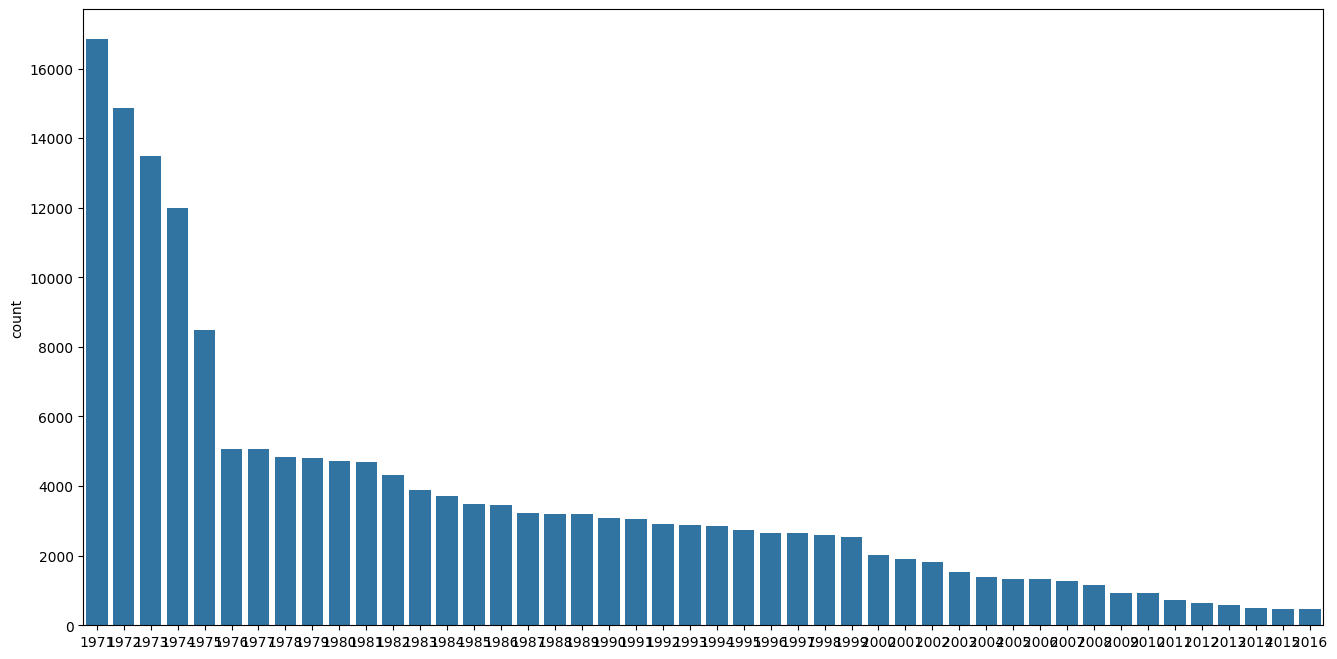

In [4]:
a = np.arange(1971, 2017)
plt.figure(figsize=(16,8))

sns.barplot(y=count_year_terror,x=a)#step 1
#plt.show()

위와 마찬가지로 index를 나라로 묶고 column을 나라별 테러횟수로 한 데이터프레임 count_country_terror를 생성 

In [5]:
count_country_terror = terrorism.pivot_table(index="country_txt", columns=terrorism["country_txt"].value_counts() )
count_country_terror = (terrorism["country_txt"].value_counts())
count_country_terror = count_country_terror.head(10)
count_country_terror

country_txt
Iraq              22130
Pakistan          13634
Afghanistan       11306
India             10978
Colombia           8163
Philippines        6212
Peru               6088
El Salvador        5320
United Kingdom     5098
Turkey             4106
Name: count, dtype: int64

y축을 횟수로 x축을 index인 나라이름으로 한 barplot 생성

<Axes: xlabel='country_txt'>

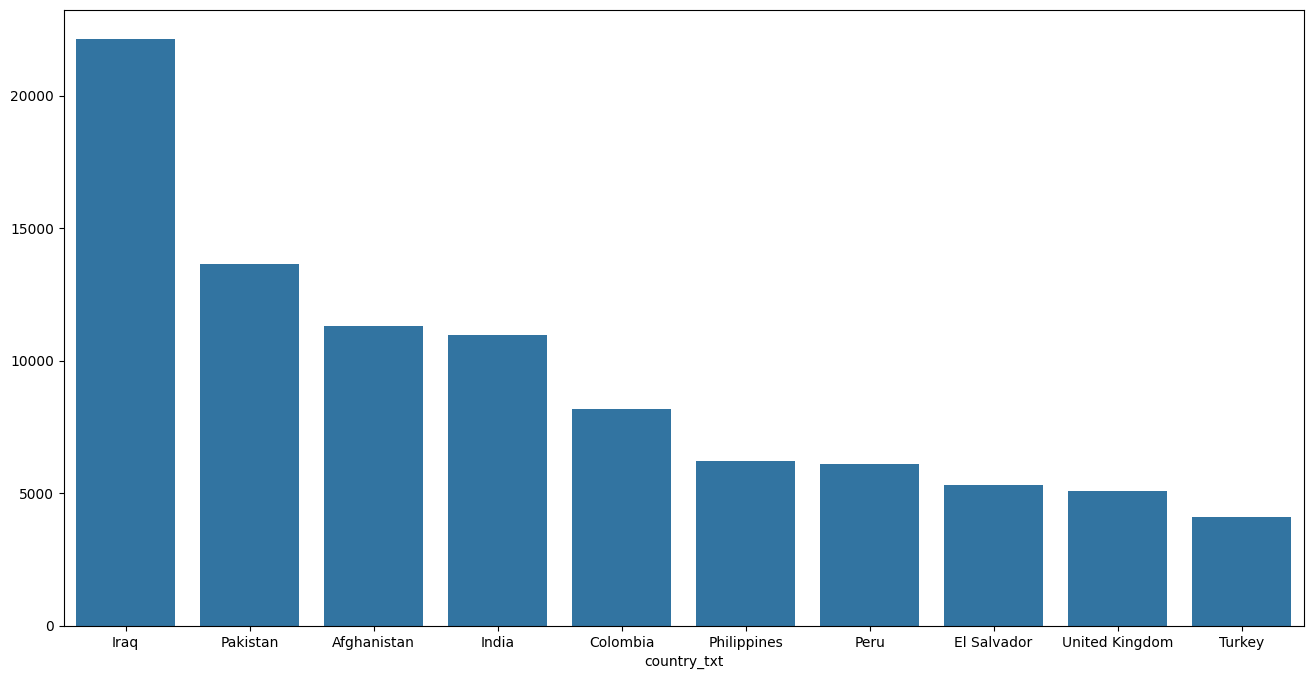

In [6]:

plt.figure(figsize=(16,8))#step 2
sns.barplot(y=count_country_terror.values, x=count_country_terror.index )

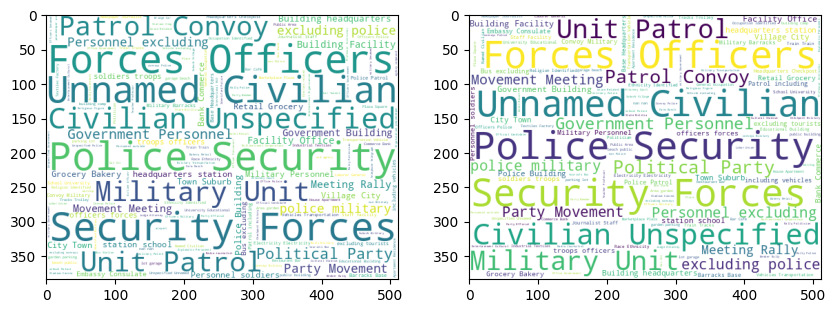

In [12]:


terror_target_before = terrorism[terrorism["iyear"] < 2012]["targsubtype1_txt"]#테러타겟
terror_target_after = terrorism[terrorism["iyear"] >= 2012]["targsubtype1_txt"]
#VIword = 
f,ax = plt.subplots(1,2,figsize=(10,10))
wordcloud1 = wc.WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(map(str,terror_target_before)))
wordcloud2 = wc.WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(map(str,terror_target_before)))

ax[0].imshow(wordcloud1)
ax[1].imshow(wordcloud2)
plt.show()



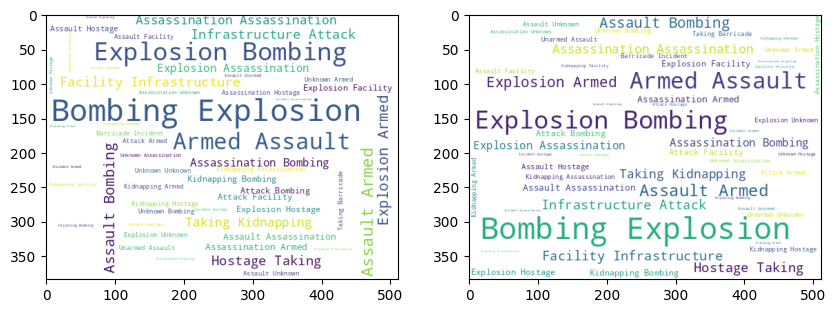

In [8]:
terror_target_before = terrorism[terrorism["iyear"] < 2012]["attacktype1_txt"]#테러방식
terror_target_after = terrorism[terrorism["iyear"] >= 2012]["attacktype1_txt"]

f,ax = plt.subplots(1,2,figsize=(10,10))
wordcloud1 = wc.WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(map(str,terror_target_before)))
wordcloud2 = wc.WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(map(str,terror_target_before)))

ax[0].imshow(wordcloud1)
ax[1].imshow(wordcloud2)
plt.show()


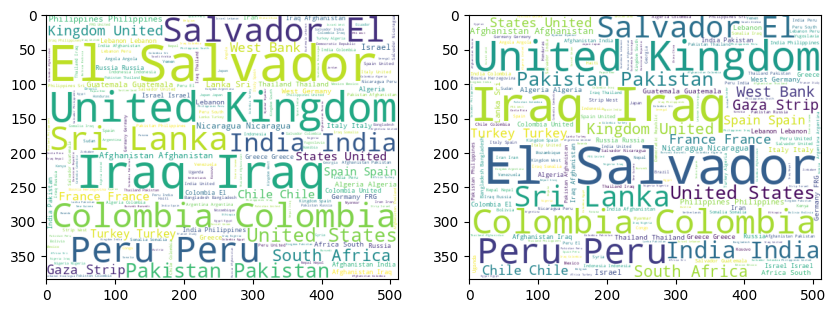

In [9]:
terror_target_before = terrorism[terrorism["iyear"] < 2012]["country_txt"]#테러발생나라
terror_target_after = terrorism[terrorism["iyear"] >= 2012]["country_txt"]

f,ax = plt.subplots(1,2,figsize=(10,10))
wordcloud1 = wc.WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(map(str,terror_target_before)))
wordcloud2 = wc.WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(map(str,terror_target_before)))

ax[0].imshow(wordcloud1)
ax[1].imshow(wordcloud2)
plt.show()

In [10]:
terror_2012_before = pd.pivot_table(data=terrorism[terrorism["iyear"]<2012] #사상자
                                    ,index="iyear", 
                                     values=["nkill","nwound"],
                                     aggfunc= [np.sum])
terror_2012_after = pd.pivot_table(data=terrorism[terrorism["iyear"]>=2012] 
                                    ,index="iyear", 
                                     values=["nkill","nwound"],
                                     aggfunc= [np.sum])


after_2012_kill = terror_2012_after.sum() / len(terror_2012_after)
before_2012_kill = terror_2012_before.sum() / len(terror_2012_before)


/tmp/ipykernel_4077/3915971006.py:1: FutureWarning: The provided callable <function sum at 0x7fef9c3128c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_2012_before = pd.pivot_table(data=terrorism[terrorism["iyear"]<2012] #사상자
/tmp/ipykernel_4077/3915971006.py:5: FutureWarning: The provided callable <function sum at 0x7fef9c3128c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_2012_after = pd.pivot_table(data=terrorism[terrorism["iyear"]>=2012]


/tmp/ipykernel_4077/865940090.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sns.barplot(y=(before_2012_kill[0], before_2012_kill[1], after_2012_kill[0], after_2012_kill[1]) ,


<Axes: >

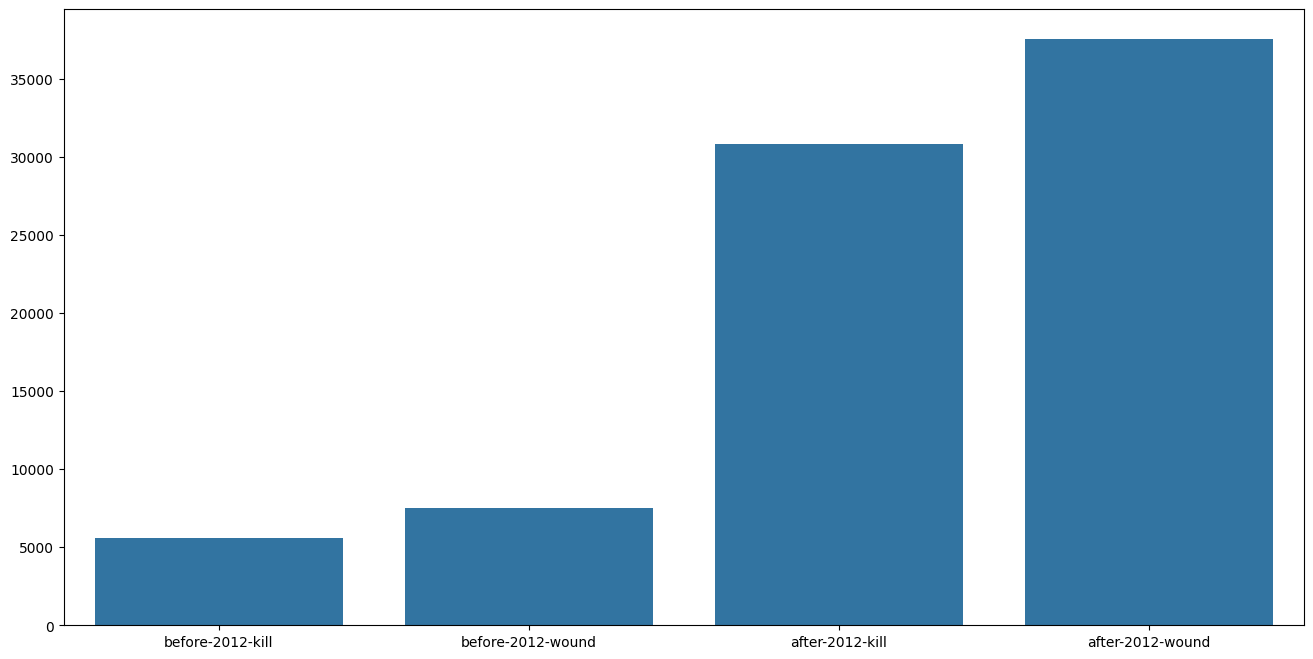

In [11]:
#f, ax =plt.subplots(figsize=(10, 8))
#ax.set_xlabel("year", fontsize=15)
#ax.set_ylabel("kill", fontsize=15)


#plt.xticks(rotation=-90)
plt.figure(figsize=(16,8))#step 3
sns.barplot(y=(before_2012_kill[0], before_2012_kill[1], after_2012_kill[0], after_2012_kill[1]) ,
            x=("before-2012-kill", "before-2012-wound", "after-2012-kill", "after-2012-wound"))






In [6]:
target_region = ["South America", "West Europe", "Middle East & North Africa", "Southeast Asia"]#step4
#공격형태, 사망자와 사상자의 수 등 지역별 특성확인
step4_terror = terrorism[ terrorism["region_txt"].isin(target_region)]
step4_terror = step4_terror[["iyear","imonth","nkill","nwound",]]
step4_terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
21,197001150001,1970,1,15,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
26,197001210001,1970,1,21,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
27,197001220001,1970,1,22,NaN,0,NaN,222,Venezuela,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
